El conjunto de datos contiene datos del clima como la precipitacion, temperatura maxima, temperatura minima, velocidad del viente y tipo de clima(lluvia, nieve, soleado) de la ciudad de seattle

In [1]:
%load_ext rpy2.ipython

In [2]:
%%R
#Cargo el archivo con los datos del clima
archivo <- "weatherData.csv"
datos <- read.csv(archivo)
head(datos)

  precipitation temp_max temp_min wind weather
1          10.9     10.6      2.8  4.5    rain
2           0.8     11.7      7.2  2.3    rain
3          20.3     12.2      5.6  4.7    rain
4           1.3      8.9      2.8  6.1    rain
5           2.5      4.4      2.2  2.2    rain
6           0.0      7.2      2.8  2.3    rain


In [3]:
%%R
#Remuevo la variable dependiente que corresponde al weather(Clima) y matengo una copia de los datos originales en otra variable
datosOriginal<-datos
datos<-datos[-5]
head(datos)

  precipitation temp_max temp_min wind
1          10.9     10.6      2.8  4.5
2           0.8     11.7      7.2  2.3
3          20.3     12.2      5.6  4.7
4           1.3      8.9      2.8  6.1
5           2.5      4.4      2.2  2.2
6           0.0      7.2      2.8  2.3


In [4]:
%%R
#aplico PCA
modelo<-prcomp(datos)

In [5]:
%%R
modelo
#Se observa la desviacion estandar de los cuatro componentes principales y se observa la varianza en las columnas para cada componente
#Se puede ver que los el primer y segundo componente captura mucha mas varianza que los otros dos
#En PC1 se puede ver que el que mas influye es temp_max, en PC2 es precipitation, es PC3 es temp_min y en PC4 wind

Standard deviations (1, .., p=4):
[1] 8.897241 6.657742 1.982080 1.345462

Rotation (n x k) = (4 x 4):
                      PC1        PC2        PC3         PC4
precipitation -0.37599227 -0.9190158  0.1065491  0.05183613
temp_max       0.79057768 -0.2645709  0.5465006 -0.07953753
temp_min       0.48150366 -0.2877181 -0.8235611  0.08437844
wind          -0.04208289 -0.0512875 -0.1083123 -0.99190074


In [6]:
%%R
#Hago un resumen estadistico del modelo, en donde se puede ver la desviacion estandar, la proporcion de la varianaza y la proporcion acumulativa
#se puede observar que PC1 tiene el 62,36% y PC2 33,17%, mientras que PC3 solo aporta un 3,04% y PC4 un 1,43%
#por lo tanto con PC1 Y PC2 permiten representar el 95,53% de los datos
summary(modelo)

Importance of components:
                          PC1    PC2    PC3     PC4
Standard deviation     8.8972 6.6577 1.9821 1.34546
Proportion of Variance 0.6126 0.3430 0.0304 0.01401
Cumulative Proportion  0.6126 0.9556 0.9860 1.00000


In [7]:
%%R
#Le asigno un color a cada categoria para su visualizacion, utilizando datosOriginal, ya que a datos se le ha eliminado la columna de weather
colores<-as.character(datosOriginal$weather)
colores[colores=="snow"]<-"red"
colores[colores=="sun"]<-"green"
colores[colores=="rain"]<-"yellow"

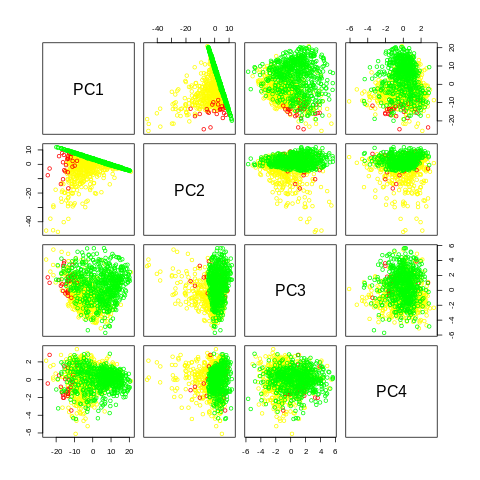

In [8]:
%%R
#Visualmente se puede observar que los componentes que logran mejor identificar el tipo de clima, corresponden
#a PC1 y PC2 puesto que muestran los datos mas separados en comparacion al resto, puesto que los puntos amarillos,verdes y rojos
#se encuentran agrupados en distintos lugares, aunque todavia estando varios superpuestos
#En los otros casos se puede observar visualmente que los puntos se muestran mas mezclados entre si
pairs(modelo$x,col=colores)